In [1]:
# data manipulation
import numpy as np
import pandas as pd



from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# data visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import metrics

In [2]:
# sets matplotlib to inline
%matplotlib inline  


from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("class C.csv")

In [4]:
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.67,0,0.70,3,149,3,0,0,support,low
1,0.67,0,0.70,3,149,3,0,0,support,low
2,0.71,0,0.50,4,253,3,0,0,RandD,medium
3,0.68,0,0.54,4,153,3,0,0,product_mng,medium
4,0.71,0,0.63,3,249,3,0,0,IT,low


In [5]:
df.shape

(7499, 10)

In [6]:
df.columns

Index(['satisfaction_level', 'left', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
len(object_col)

In [ ]:
df.dtypes

In [ ]:
df.isnull().any()

In [ ]:
df.corr()

In [ ]:
def plot_factorplot(attr,labels=None):
    sns.catplot(data=df,kind='count',height=5,aspect=1.5,x=attr)

In [ ]:
cat_df=df.select_dtypes(include='object')

<Figure size 1080x1080 with 0 Axes>

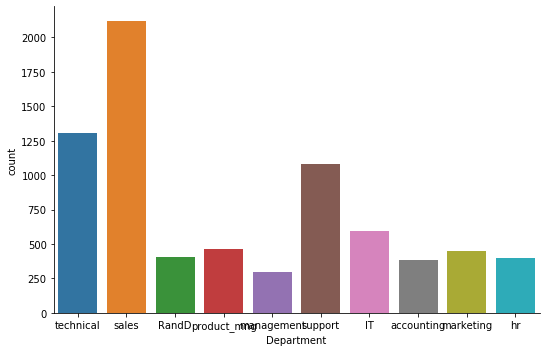

<Figure size 1080x1080 with 0 Axes>

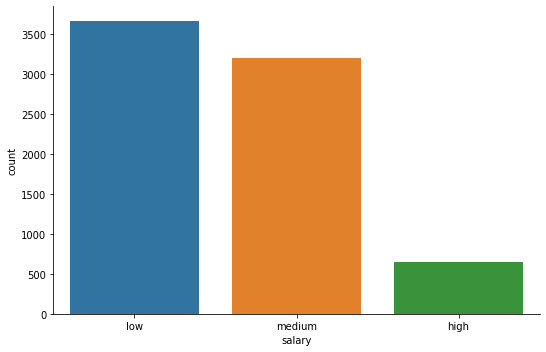

In [27]:
for i in cat_df:
    plt.figure(figsize=(15, 15))
    plot_factorplot(i) 

In [28]:
df.corr()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,-0.395018,0.131575,-0.054294,0.159760,-0.299281,0.060573,0.096496
left,-0.395018,1.000000,-0.320545,-0.456649,-0.336768,0.021868,-0.155734,-0.086563
last_evaluation,0.131575,-0.320545,1.000000,0.097769,0.229572,-0.083260,0.045881,0.110695
number_project,-0.054294,-0.456649,0.097769,1.000000,0.266918,0.029836,0.069249,0.150904
average_montly_hours,0.159760,-0.336768,0.229572,0.266918,1.000000,-0.016937,0.058311,0.075836
time_spend_company,-0.299281,0.021868,-0.083260,0.029836,-0.016937,1.000000,0.018720,0.218707
Work_accident,0.060573,-0.155734,0.045881,0.069249,0.058311,0.018720,1.000000,0.053851
promotion_last_5years,0.096496,-0.086563,0.110695,0.150904,0.075836,0.218707,0.053851,1.000000


In [29]:
#cat_col = df.select_dtypes(exclude=np.number).columns
cat_col = df.select_dtypes(exclude=np.number)
cat_col

,Department,salary
0,technical,low
1,sales,medium
2,RandD,low
3,RandD,low
4,technical,medium
...,...,...
7494,sales,low
7495,sales,low
7496,sales,low
7497,RandD,medium


In [30]:
for i in cat_col:
    print(df[i].value_counts())

sales          2119
technical      1308
support        1082
IT              591
product_mng     461
marketing       450
RandD           409
hr              398
accounting      383
management      298
Name: Department, dtype: int64
low       3659
medium    3191
high       649
Name: salary, dtype: int64


In [31]:
numerical_col = df.select_dtypes(include=np.number)
numerical_col

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.96,0,0.72,3,197,3,0,0
1,0.99,0,0.48,5,202,2,0,0
2,0.51,0,0.52,5,261,3,1,0
3,0.51,0,0.52,5,261,3,1,0
4,0.90,0,0.74,3,193,3,0,0
...,...,...,...,...,...,...,...,...
7494,0.41,1,0.46,2,160,3,0,1
7495,0.41,1,0.46,2,160,3,0,1
7496,0.41,1,0.46,2,160,3,0,1
7497,0.37,0,0.41,2,113,3,0,1


In [32]:
for i in numerical_col:
    print(i)

satisfaction_level
left
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
promotion_last_5years


In [33]:
df.columns.shape

(10,)

In [34]:
one_hot_categorical_variables = pd.get_dummies(cat_col)

In [35]:
one_hot_categorical_variables.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1


In [36]:
df = pd.concat([numerical_col,one_hot_categorical_variables],sort=False,axis=1)
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.96,0,0.72,3,197,3,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.99,0,0.48,5,202,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.51,0,0.52,5,261,3,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.51,0,0.52,5,261,3,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.90,0,0.74,3,193,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
x = df.drop(columns='left')

In [38]:
y = df['left']

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
print(scores)



[0.76666667 0.924      0.92533333 0.91733333 0.92266667 0.86
 0.832      0.824      0.688      0.77036048]


In [40]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.8430360480640854
